## DB Car suggestion ML model

Author: Ty

Date: 5/30/19

Added MySQL

Export output of 100 tests.
I also changed N =2, that way I can get trucks. N=10 is also 75%, but I can't get any trucks would be impossible.


What kind of car would Jeff want if he only gave us his values?

If he gave us what kind of car he would want, can the model confirm this?

Our friend Jeff said, [8,5,8,3] and that he wants a Sedan.

Now we are going to add a batch job as well.

## Timer

Before we get started, I am going to include a timer so we know how long it takes to run the code.


In [1]:
import time
start_time = time.time()

## Bring in the data

First I am going to pull the data from my MySQL database and prep the data.

In [2]:
#First import pandas so that we can see the data in a dataframe view.
import pandas as pd

In [3]:
#Import the mysql library so we can use sql and connect the MySQL Database.
import mysql.connector as sql

In [4]:
#Connect to the database
db_connection = sql.connect(host='localhost', database='ty_db', user='root', password = '')

#Activate the cursor
db_cursor = db_connection.cursor()

#Execaute SQL code
db_cursor.execute('SELECT * FROM car_data_wip')

#Pull all the data from the SQL code
table_rows = db_cursor.fetchall()

#Store teh data in a Pandas dataframe
mydata = pd.DataFrame(table_rows)

#Turn off the cursor
db_cursor.close()

#Close the connection to the database
db_connection.close()

In [5]:
#Preview the data. This is a small dataset, so I can show all of it.
mydata

,0,1,2,3,4,5,6,7,8
0,1,Ben,9,6,6,8,SUV,Burbank,CA
1,2,Patrick,9,7,6,5,Sedan,Burbank,CA
2,3,Matt,10,5,7,1,Sedan,Sherman Oaks,CA
3,4,Jared,5,1,6,1,Sedan,Santa Monica,CA
4,5,Andrew,7,8,9,2,Sedan,Burbank,CA
5,6,Aaron,9,6,10,8,Truck,North Hollywood,CA
6,7,Tom,7,7,7,3,Sedan,Torrance,CA
7,8,Philip,6,8,8,5,SUV,Burbank,CA
8,9,Eli,7,5,8,3,Truck,Whittier,CA
9,10,Kirk,8,7,7,1,SUV,Santa Clarita,CA


In [6]:
#Create the field headers and view the data
mydata.columns = ['Record_ID', 'Name', 'MPG', 'Power', 'Storage_Capacity', 'Towing', 'Type', 'City', 'State']

In [7]:
#Set the Index column
mydata= mydata.set_index('Record_ID')

In [8]:
#View the first five rows with the new headers added
mydata.head()

,Name,MPG,Power,Storage_Capacity,Towing,Type,City,State
Record_ID,,,,,,,,
1,Ben,9,6,6,8,SUV,Burbank,CA
2,Patrick,9,7,6,5,Sedan,Burbank,CA
3,Matt,10,5,7,1,Sedan,Sherman Oaks,CA
4,Jared,5,1,6,1,Sedan,Santa Monica,CA
5,Andrew,7,8,9,2,Sedan,Burbank,CA


## Setup the model and do an quick initial test

In [9]:
#Assign the X values
X = mydata[['MPG', 'Power', 'Storage_Capacity', 'Towing']]

In [10]:
#Preview our data
#Now we have our X data ready to Fit into the model
X.head()

,MPG,Power,Storage_Capacity,Towing
Record_ID,,,,
1,9,6,6,8
2,9,7,6,5
3,10,5,7,1
4,5,1,6,1
5,7,8,9,2


In [11]:
#Assign the y values
#Alt way is: y = mydata['Type'] #This does a dataframe
y = mydata.Type

In [12]:
#Preview our data
#Now we have our y data ready to Fit into the model
y.head()

Record_ID
1      SUV
2    Sedan
3    Sedan
4    Sedan
5    Sedan
Name: Type, dtype: object

## K Nearest Neighbors

In [13]:
#Let me show you an image and explain

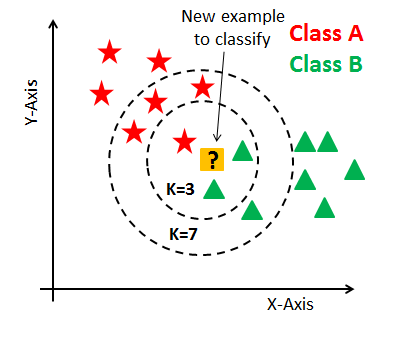

In [14]:
from IPython.display import display, Image
display(Image(filename='KNN image.png'))

The parameter you set will effect the number of neighbors the model will include.
For starters, lets look at N=1

In [15]:
#Step 1: Import the class you plan to use. We are using nearest neighbor here.
from sklearn.neighbors import KNeighborsClassifier

In [16]:
#Step 2: "Instantiate" the "estimator"
#"Estimator" is scikit-learn's term for model
#"Instantiate" means "make an instance of"

knn = KNeighborsClassifier(n_neighbors=1)

In [17]:
#Step 3: Fit the model with data (aka "model training")
#Model is learing the relationship between X and y
#Occurs in-place. So you don't need to assign the results to a new object.
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [18]:
#Here is an example of one Out-of-Sample observation we can test
knn.predict([[8,5,8,3]])

array(['Truck'], dtype=object)

Hmm, well he didn't want a truck. Let's explain how this model works and why K-Nearest Neighbor equal to one might not be the best parameter. Let's find a better parameter value.

## Improve our model
Testing our model with the method: Train/Test Split
Here were are going to split our data set into 2 pieces: training and testing sets

Like an 80/20 split

We are going to use Scikit-learns built in train/test split function. We are going to split the X and y into 2 parts

test_size=0.4 means 40% test size and the rest is training.

Random State allows for consistent re-runs.

In [19]:
#Step 1: Split X and y into training and testing sets
#Import metrics to get accuracy rating.
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)

In [21]:
#print the shapes of the new X objects
print (X_train.shape)
print (X_test.shape)

(15, 4)
(4, 4)


In [22]:
#print the shapes of the new y objects
print (y_train.shape)
print (y_test.shape)

(15,)
(4,)


### How accurate is it if N =5?

In [23]:
#Repeat for KNN with K=5:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.5


### What is the best value for N?

In [24]:
#Let's try a range of values for K. 
# try K=1 through K=12
#This range will vary based on the size of your dataset.
k_range = list(range(1, 12))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

### Lets visualize our N value results

Text(0, 0.5, 'Testing Accuracy')

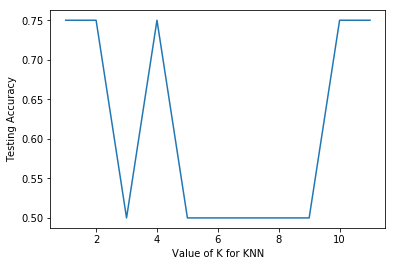

In [25]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### What is the accuracy if N = 2?

In [26]:
#Repeat for KNN with a new value:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.75


### Explain why 2 is better than 10

Even though the % was the same, there were only 2 trucks in our data, so we could never have a majority
of trucks if N = 10.

In [27]:
# Instantiate the model with the best known parameters. Make sure to set n
knn = KNeighborsClassifier(n_neighbors=2)

# train the model with X and y (not X_train and y_train)
knn.fit(X, y)

# make a prediction for an out-of-sample observation
#Creating our own observation
knn.predict([[8, 5, 8, 3]])

array(['Sedan'], dtype=object)

## Results

The model has X percent confidence that the person would want the predicted type of vehicle based on the data we have collected.

## Now lets do this in bulk

In [28]:
#You can also predict for mulitple observations at once.
#This can be done in bulk. Use Excel or Python to concate.
#Then paste or For loop through the field.
X_new = [
[9,5,4,2],
[8,5,2,1],
[3,6,10,9],
[3,5,5,8],
[7,5,4,3],
[9,8,9,1],
[4,9,7,3],
[4,7,3,2],
[6,10,9,3],
[9,10,5,7],
[9,3,9,1],
[4,1,8,5],
[2,2,10,7],
[7,2,1,9],
[3,10,7,2],
[2,4,3,6],
[5,10,9,5],
[3,6,6,2],
[7,9,7,5],
[3,10,2,9],
[10,2,3,4],
[7,6,9,6],
[2,4,6,2],
[10,4,9,9],
[7,6,6,9],
[7,3,6,5],
[5,2,9,7],
[10,2,7,3],
[10,3,6,1],
[7,10,7,9],
[7,9,7,1],
[1,7,9,8],
[2,6,4,6],
[2,3,7,5],
[6,2,2,1],
[8,3,5,6],
[5,1,5,8],
[3,7,8,10],
[9,5,6,7],
[3,9,7,10],
[2,9,4,4],
[10,8,7,2],
[8,3,4,4],
[7,2,4,5],
[1,7,9,5],
[3,6,4,10],
[9,3,9,1],
[6,5,7,4],
[7,1,6,4],
[5,9,7,9],
[9,1,1,1],
[8,3,7,8],
[8,10,1,4],
[3,3,9,10],
[5,3,8,10],
[4,2,6,9],
[5,5,4,10],
[4,4,5,5],
[8,3,10,9],
[8,10,6,5],
[1,9,7,2],
[1,4,7,9],
[10,6,4,8],
[5,2,8,8],
[3,3,8,5],
[7,7,7,3],
[2,7,4,1],
[1,3,2,4],
[6,4,10,6],
[5,5,9,8],
[2,10,1,1],
[4,5,3,8],
[7,4,10,7],
[3,4,4,10],
[8,1,8,2],
[9,7,2,10],
[1,5,5,8],
[10,9,1,4],
[3,2,1,3],
[9,2,8,2],
[7,10,7,4],
[10,3,5,3],
[9,5,2,5],
[8,4,8,4],
[5,5,10,3],
[1,2,6,10],
[7,7,7,4],
[4,5,8,7],
[8,8,1,3],
[6,8,2,10],
[8,5,6,3],
[7,7,2,8],
[2,6,3,1],
[2,1,1,6],
[7,8,2,3],
[4,4,6,8],
[6,6,6,10],
[9,3,4,4],
[1,8,5,4]
]

In [29]:
#Run multiple ones:
#Store the results in a variable array.
Result1 = knn.predict(X_new)

In [30]:
#Let's view our results from the variable array
Result1

array(['Sedan', 'Sedan', 'SUV', 'SUV', 'Sedan', 'SUV', 'SUV', 'Sedan',
       'SUV', 'SUV', 'Sedan', 'Sedan', 'SUV', 'SUV', 'SUV', 'SUV', 'SUV',
       'Sedan', 'SUV', 'SUV', 'Sedan', 'SUV', 'Sedan', 'SUV', 'SUV',
       'Sedan', 'Truck', 'Sedan', 'Sedan', 'SUV', 'SUV', 'SUV', 'SUV',
       'Sedan', 'Sedan', 'SUV', 'SUV', 'SUV', 'SUV', 'SUV', 'SUV', 'SUV',
       'Sedan', 'Sedan', 'SUV', 'SUV', 'Sedan', 'Sedan', 'Sedan', 'SUV',
       'Sedan', 'SUV', 'Sedan', 'SUV', 'SUV', 'SUV', 'SUV', 'Sedan',
       'SUV', 'SUV', 'SUV', 'SUV', 'SUV', 'SUV', 'Sedan', 'Sedan',
       'Sedan', 'Sedan', 'Truck', 'SUV', 'Sedan', 'SUV', 'Truck', 'SUV',
       'Sedan', 'SUV', 'SUV', 'Sedan', 'Sedan', 'Sedan', 'SUV', 'Sedan',
       'Sedan', 'Sedan', 'Sedan', 'SUV', 'SUV', 'SUV', 'Sedan', 'SUV',
       'Sedan', 'SUV', 'Sedan', 'Sedan', 'Sedan', 'SUV', 'SUV', 'Sedan',
       'SUV'], dtype=object)

In [31]:
#Import the untested data.
df1= pd.read_excel('Results_Tester2.xlsx')

In [32]:
#Let's view our data.
df1.head()

,Record_ID,Name,MPG,Power,Storage_Capacity,Towing,Input,City,State
0,100,Kyung Bail,9,5,4,2,"[9,5,4,2],",Sherman Oaks,CA
1,101,Ophelia Neira,8,5,2,1,"[8,5,2,1],",Los Angeles,CA
2,102,Pilar Hafley,3,6,10,9,"[3,6,10,9],",Sherman Oaks,CA
3,103,Karie Cutting,3,5,5,8,"[3,5,5,8],",Van Nuys,CA
4,104,Tosha Tam,7,5,4,3,"[7,5,4,3],",Valencia,CA


In [33]:
#Now let's add our predicted results to our untested data
df1['Result'] = Result1

In [34]:
#Here is our newly tested data with the predicted results.
df1

,Record_ID,Name,MPG,Power,Storage_Capacity,Towing,Input,City,State,Result
0,100,Kyung Bail,9,5,4,2,"[9,5,4,2],",Sherman Oaks,CA,Sedan
1,101,Ophelia Neira,8,5,2,1,"[8,5,2,1],",Los Angeles,CA,Sedan
2,102,Pilar Hafley,3,6,10,9,"[3,6,10,9],",Sherman Oaks,CA,SUV
3,103,Karie Cutting,3,5,5,8,"[3,5,5,8],",Van Nuys,CA,SUV
4,104,Tosha Tam,7,5,4,3,"[7,5,4,3],",Valencia,CA,Sedan
5,105,Youlanda Fenimore,9,8,9,1,"[9,8,9,1],",Van Nuys,CA,SUV
6,106,Veronica Gathers,4,9,7,3,"[4,9,7,3],",Sherman Oaks,CA,SUV
7,107,Huey Krikorian,4,7,3,2,"[4,7,3,2],",Long Beach,CA,Sedan
8,108,Juan Corrado,6,10,9,3,"[6,10,9,3],",Long Beach,CA,SUV
9,109,Timika Didomenico,9,10,5,7,"[9,10,5,7],",North Hollywood,CA,SUV


In [35]:
#Now, export the dataframe as an excel file.
df1.to_excel('Output_100_Records_to_Excel.xlsx')

In [36]:
print ("Your code is done.")

Your code is done.


## What we have done so far and what we are going to do next

To give you an illustration of what we have done so far, I will go over this data flow chart I created:

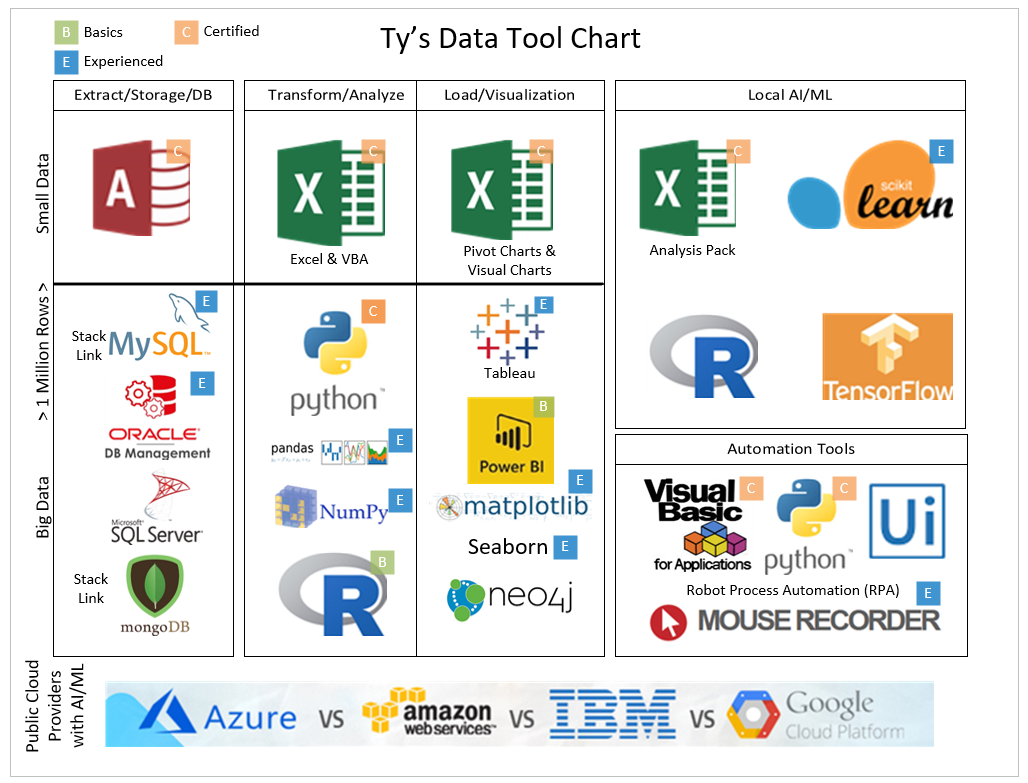

In [37]:
display(Image(filename='Ty Data Tool Chart.png'))

In [38]:
#Output of how long the code took to finish
final_time = int(time.time() - start_time)

print ("My program took", final_time, "seconds to run")

My program took 6 seconds to run


## Now lets get into Tableau

Here is a visualization of the training data

https://public.tableau.com/profile/ty6116#!/vizhome/MLCarSample/CarML

Here is a visualization of the output data

https://public.tableau.com/profile/ty6116#!/vizhome/CarML100Output/CarStory